# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
# This is a dataset related to 17 different marketing campaigns over a period of a little over 2 years.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.dummy import DummyClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report

In [3]:
bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
#This is a dataset based on a series of different marketing campaigns whose goal was to get contacts to subscribe to a bank deposit
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
benchmarkdata = bank[['duration','y']]
bank = bank.drop_duplicates()
bank = bank.drop('duration',axis=1)
bank = bank.query("job != 'unknown'")
bank = bank.query("marital != 'unknown'")
bank = bank.query("education != 'unknown'")
bank = bank.query("housing != 'unknown'")
bank = bank.query("loan != 'unknown'")
X = bank.drop('y',axis=1)
y = bank['y']
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38234 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38234 non-null  int64  
 1   job             38234 non-null  object 
 2   marital         38234 non-null  object 
 3   education       38234 non-null  object 
 4   default         38234 non-null  object 
 5   housing         38234 non-null  object 
 6   loan            38234 non-null  object 
 7   contact         38234 non-null  object 
 8   month           38234 non-null  object 
 9   day_of_week     38234 non-null  object 
 10  campaign        38234 non-null  int64  
 11  pdays           38234 non-null  int64  
 12  previous        38234 non-null  int64  
 13  poutcome        38234 non-null  object 
 14  emp.var.rate    38234 non-null  float64
 15  cons.price.idx  38234 non-null  float64
 16  cons.conf.idx   38234 non-null  float64
 17  euribor3m       38234 non-null  floa

In [6]:
bank['contact'].value_counts()

contact
cellular     24432
telephone    13802
Name: count, dtype: int64

In [7]:
# After examining value counts for each of the columns, I have decided to remove any rows with a value listed as Unknown
#the only exception is the 'default' column. it had over 8000 'unknowns' and this column is big for us 
# This leaves me with 38245 entries 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
# The business objective is to garner insight into what causes/leads to someone subscribing to the deposit.
#This will allow us to make clear reccomendations for marketing best practices going forward when marketing the subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
#First i'll plot the numerical features to see what their relationships look like

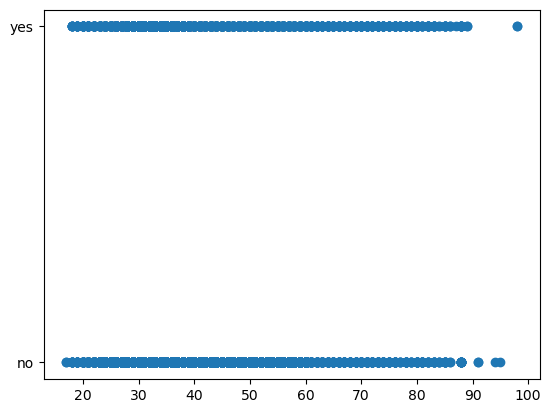

In [10]:
plt.scatter(bank['age'],bank['y'])

In [11]:
categorical = ['job','marital','housing','loan','contact','month','day_of_week','default']
educationencoder = ['education']
education = [['university.degree','professional.course','high.school','basic.9y','basic.6y','basic.4y','illiterate']]
poutcome = ['poutcome']
poutcomeencoder = [['success','failure','nonexistent']]
numerical = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [12]:
polytransformer = Pipeline([
                                    ('poly',PolynomialFeatures(degree = 3,include_bias=False)),
                                    ('scale',StandardScaler())
                                ])
transformers = [('polynomialtransformations',polytransformer,numerical),
    ('educationencoder', OrdinalEncoder(categories = education),educationencoder),
    ('poutcomeencoder', OrdinalEncoder(categories = poutcomeencoder),poutcome),
    ('OHE', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical)]
transform = ColumnTransformer(transformers = transformers,remainder='passthrough')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
#This split my data into training and test sets, I have decided to use 3/4 of the data to train the models on and 1/4 to cross-validate it afterwards

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
#Below is a Dummy Classifier model that is used to get a general baseline for future models. This classifier makes decision in a very basic manner so the hope is that a more advanced model can improve on the dummy classifier

In [16]:
baselinemodel = Pipeline([
    ('transform',transform),
    ('dummy',DummyClassifier(random_state=42))
])
baselinemodel

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialtransformations',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('educationencoder',
                                                  O...
                                                                              'basic.6y',
                                                                              'basic.4y',
                                                                              'illiterate']]),
                                                  ['education']),
                                                 ('poutcomeencoder',
                                                  OrdinalEncoder(categories=[['success',
                                                                              'failure',
                                                                              'nonexistent']]),
                                                  ['poutcome']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week',
                                                   'default'])])),
                ('dummy', DummyClassifier(random_state=42))])

In [17]:
baselinemodel = baselinemodel.fit(X_train,y_train)
baselinescore = baselinemodel.score(X_test,y_test)
baselinescore

0.8857621090072183

In [18]:
# my baseline accuracy score is about .89, showing that of ALL of the predctions about 89% were correct, leaving 11% incorrect predictions

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
#below is a logistic regression without much tuning
logreg = Pipeline([
    ('transform',transform),
    ('logreg',LogisticRegression(random_state=42,max_iter=1000))
],verbose=True)


In [20]:
logregbasic = logreg.fit(X_train,y_train)

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   2.1s


### Problem 9: Score the Model

What is the accuracy of your model?

In [21]:
logregscore = logregbasic.score(X_test,y_test)
logregtrainscore =logregbasic.score(X_train,y_train)
logregscore

0.9014541270007322

In [22]:
#The Logistic Regression without much tuning performed about 2% better than the dummy classifier, I think a Logistic Regression model with tuned hyperparameters should be able to predict whether someone subscribed or not in a more accurate fashion

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
svm_basic = Pipeline([
    ('transform',transform),
    ('svm',SVC(random_state=42))
],verbose=True)
svm_basic.fit(X_train,y_train)
svm_basic_score = svm_basic.score(X_test,y_test)
svm_train_score = svm_basic.score(X_train,y_train)

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svm, total= 1.5min


In [24]:
decisiontree_basic = Pipeline([
    ('transform',transform),
    ('decision',DecisionTreeClassifier(random_state=42))
],verbose=True)
decisiontree_basic.fit(X_train,y_train)
decision_basic_train_score = decisiontree_basic.score(X_train,y_train)
decision_basic_score = decisiontree_basic.score(X_test,y_test)

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   2.4s


In [25]:
knn_model_basic = Pipeline([
    ('transform',transform),
    ('knn',KNeighborsClassifier())
],verbose=True)
knn_model_basic.fit(X_train,y_train)
knntrainscore = knn_model_basic.score(X_train,y_train)
knnscore = knn_model_basic.score(X_test,y_test)

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


In [26]:
print(svm_train_score)
print(svm_basic_score)
print(decision_basic_train_score)
print(decision_basic_score)
print(knntrainscore)
print(knnscore)

0.9015867480383609
0.8985249503086097
0.9955013077593723
0.8384768281200963
0.914768962510898
0.8870174704466994


In [27]:
data = {
    'Model': ['Logistic Regression','SVM','Decision Tree','KNN'],
    'Train Time':[2.2,84,2,0],
    'Train Accuracy':[logregtrainscore,svm_train_score,decision_basic_train_score,knntrainscore],
    'Test Accuracy' : [logregscore,svm_basic_score,decision_basic_score,knnscore]
}

initialresults = pd.DataFrame(data)
initialresults

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,2.2,0.901901,0.901454
1,SVM,84.0,0.901587,0.898525
2,Decision Tree,2.0,0.995501,0.838477
3,KNN,0.0,0.914769,0.887017


In [28]:
coefs = logregbasic.named_steps['logreg'].coef_.flatten()
coefnames = logregbasic.named_steps['transform'].get_feature_names_out()
odds_ratios = np.exp(logregbasic.named_steps['logreg'].coef_[0])

In [29]:
# BELOW IS A DATAFRAME WITH THE COEFICIENTS AND DERIVED ODDS RATIOS
logregcoefs = pd.DataFrame({'features': coefnames, 'coefs': coefs,'odds ratios': odds_ratios})
logregcoefs['abscoefs'] = logregcoefs['coefs'].abs()
logregcoefs = logregcoefs.sort_values(by = 'abscoefs',ascending = False)
logregcoefs.head(30)

,features,coefs,odds ratios,abscoefs
215,polynomialtransformations__euribor3m^3,1.341172,3.823521,1.341172
240,OHE__month_mar,1.185976,3.273880,1.185976
160,polynomialtransformations__pdays euribor3m^2,0.953806,2.595569,0.953806
184,polynomialtransformations__emp.var.rate^3,0.942946,2.567533,0.942946
212,polynomialtransformations__cons.conf.idx eurib...,-0.912594,0.401482,0.912594
244,OHE__month_sep,0.785802,2.194167,0.785802
60,polynomialtransformations__age^2 cons.conf.idx,-0.742698,0.475828,0.742698
235,OHE__contact_telephone,-0.716447,0.488485,0.716447
54,polynomialtransformations__age^3,-0.708581,0.492343,0.708581
87,polynomialtransformations__age emp.var.rate eu...,0.691783,1.997274,0.691783


In [30]:
# None the features overwhelmingly seem to contribute to success, but contact method, and month of the year, among other things, seem to have a tangible effect

In [31]:
#The Logistic regression was the most efficient, SVM's also performed well in terms of score, however it took much  longer to fit the model. The Logistic Regression can predict with about 90% accuracy whether someone will subscribe or not.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [32]:
#SVM WITH HYPERPARAMETER TUNING

svmparams = {'svm__kernel': ['linear','poly','rbf']}
svmgrid = GridSearchCV(svm_basic,param_grid=svmparams,scoring='accuracy',cv=3).fit(X_train,y_train)
svmgrid.best_params_

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svm, total=21.1min
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svm, total=25.9min
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svm, total=13.2min
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svm, total=  29.5s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svm, total=  29.9s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svm, total=  26.2s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svm, total=  23.7s
[Pipel

{'svm__kernel': 'linear'}

In [34]:
# Here are the results of my final SVM with tuned hyperparameters:
final_svm_test_score= svmgrid.best_estimator_.score(X_test,y_test)
final_svm_train_score = svmgrid.best_estimator_.score(X_train,y_train) 
final_svm_fit_time = svmgrid.refit_time_
final_svm_best_params = svmgrid.best_params_
print(f'SVM training accuracy score: {final_svm_train_score}')
print(f'SVM test accuracy score: {final_svm_test_score}')
print(f'SVM fit time: {final_svm_fit_time}')
print(f'SVM best model parameters: {final_svm_best_params}')

SVM training accuracy score: 0.9002615518744551
SVM test accuracy score: 0.8984203368553196
SVM fit time: 3083.791956424713
SVM best model parameters: {'svm__kernel': 'linear'}


In [35]:
#HERE IS A DECISION TREE WITH TUNED HYPERPARAMETERS
decisionparams = {'decision__max_depth': [2,3,4,5,6,7,8]}
decisiontree_grid = GridSearchCV(decisiontree_basic,param_grid =decisionparams,scoring='accuracy',cv=3).fit(X_train,y_train)
decisiontree_grid.best_params_


[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.3s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.3s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.3s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.4s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.4s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.4s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] .......... (step 2 of 2) Processing decision, total=   0.5s
[Pipel

{'decision__max_depth': 3}

In [37]:
# Here are the results of my final Decision Tree with tuned hyperparameters:
final_decisiontree_test_score= decisiontree_grid.best_estimator_.score(X_test,y_test)
final_decisiontree_train_score = decisiontree_grid.best_estimator_.score(X_train,y_train)
final_decisiontree_fit_time = decisiontree_grid.refit_time_
final_decisiontree_best_params = decisiontree_grid.best_params_
print(f'Decision Tree training accuracy score: {final_decisiontree_train_score}')
print(f'Decision Tree test accuracy score: {final_decisiontree_test_score}')
print(f'Decision Tree fit time: {final_decisiontree_fit_time}')
print(f'Decision Tree best model parameters: {final_decisiontree_best_params}')



Decision Tree training accuracy score: 0.9012728857890148
Decision Tree test accuracy score: 0.8984203368553196
Decision Tree fit time: 0.892340898513794
Decision Tree best model parameters: {'decision__max_depth': 3}


In [38]:
# Here are the results of a tuned KNN model
knnparams = {'knn__n_neighbors': list(range(1, 20, 1))}
knn_grid = GridSearchCV(knn_model_basic,param_grid=knnparams,scoring='accuracy',cv=3).fit(X_train,y_train)
knn_grid.best_params_

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipel

{'knn__n_neighbors': 19}

In [39]:
# Here are the results of my final K Nearest Neighbors model with tuned hyperparameters:
final_knn_test_score= knn_grid.best_estimator_.score(X_test,y_test)
final_knn_train_score = knn_grid.best_estimator_.score(X_train,y_train)
final_knn_fit_time = knn_grid.refit_time_
final_knn_best_params = knn_grid.best_params_
print(f'K Nearest Neighbors training accuracy score: {final_knn_train_score}')
print(f'K Nearest Neighbors test accuracy score: {final_knn_test_score}')
print(f'K Nearest Neighbors fit time: {final_knn_fit_time}')
print(f'K Nearest Neighbors best model parameters: {final_knn_best_params}')


K Nearest Neighbors training accuracy score: 0.9046207497820401
K Nearest Neighbors test accuracy score: 0.897688042682289
K Nearest Neighbors fit time: 0.23565673828125
K Nearest Neighbors best model parameters: {'knn__n_neighbors': 19}


In [40]:
#LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING
logreg_params = {'logreg__solver':['liblinear','lbfgs'] ,'logreg__penalty':['l1','l2'],'logreg__class_weight':[None,'balanced'],'logreg__C': [0.1, 1.0],'logreg__max_iter': [1000], 'logreg__random_state': [42]}
logreg_grid = GridSearchCV(logreg,param_grid=logreg_params,scoring='accuracy',cv=3).fit(X_train,y_train)

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   5.2s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   3.6s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   3.1s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   2.1s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   2.1s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.1s
[Pipel

C:\Users\joshua\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joshua\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joshua\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joshua\AppData\Local\anaconda3\Lib\site-packages\sklearn\

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.2s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   9.0s


In [41]:
# Here are the results of my final Logistic Regression with tuned hyperparameters:
final_logreg_test_score= logreg_grid.best_estimator_.score(X_test,y_test)
final_logreg_train_score = logreg_grid.best_estimator_.score(X_train,y_train)
final_logreg_fit_time = logreg_grid.refit_time_
final_logreg_best_params = logreg_grid.best_params_
print(f'Logistic Regression training accuracy score: {final_logreg_train_score}')
print(f'Logistic Regression test accuracy score: {final_logreg_test_score}')
print(f'Logistic Regression fit time: {final_logreg_fit_time}')
print(f'Logistic Regression best model parameters: {final_logreg_best_params}')

Logistic Regression training accuracy score: 0.9015518744551002
Logistic Regression test accuracy score: 0.901140286640862
Logistic Regression fit time: 9.257467031478882
Logistic Regression best model parameters: {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__max_iter': 1000, 'logreg__penalty': 'l1', 'logreg__random_state': 42, 'logreg__solver': 'liblinear'}


In [42]:
# FINAL RESULTS
print(f'Logistic Regression training accuracy score: {final_logreg_train_score}')
print(f'Logistic Regression test accuracy score: {final_logreg_test_score}')
print(f'Logistic Regression fit time: {final_logreg_fit_time}')
print(f'Logistic Regression best model parameters: {final_logreg_best_params}')
print(f'SVM training accuracy score: {final_svm_train_score}')
print(f'SVM test accuracy score: {final_svm_test_score}')
print(f'SVM fit time: {final_svm_fit_time}')
print(f'SVM best model parameters: {final_svm_best_params}')
print(f'Decision Tree training accuracy score: {final_decisiontree_train_score}')
print(f'Decision Tree test accuracy score: {final_decisiontree_test_score}')
print(f'Decision Tree fit time: {final_decisiontree_fit_time}')
print(f'Decision Tree best model parameters: {final_decisiontree_best_params}')
print(f'K Nearest Neighbors training accuracy score: {final_knn_train_score}')
print(f'K Nearest Neighbors test accuracy score: {final_knn_test_score}')
print(f'K Nearest Neighbors fit time: {final_knn_fit_time}')
print(f'K Nearest Neighbors best model parameters: {final_knn_best_params}')

Logistic Regression training accuracy score: 0.9015518744551002
Logistic Regression test accuracy score: 0.901140286640862
Logistic Regression fit time: 9.257467031478882
Logistic Regression best model parameters: {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__max_iter': 1000, 'logreg__penalty': 'l1', 'logreg__random_state': 42, 'logreg__solver': 'liblinear'}
SVM training accuracy score: 0.9002615518744551
SVM test accuracy score: 0.8984203368553196
SVM fit time: 3083.791956424713
SVM best model parameters: {'svm__kernel': 'linear'}
Decision Tree training accuracy score: 0.9012728857890148
Decision Tree test accuracy score: 0.8984203368553196
Decision Tree fit time: 0.892340898513794
Decision Tree best model parameters: {'decision__max_depth': 3}
K Nearest Neighbors training accuracy score: 0.9046207497820401
K Nearest Neighbors test accuracy score: 0.897688042682289
K Nearest Neighbors fit time: 0.23565673828125
K Nearest Neighbors best model parameters: {'knn__n_neighbors'

In [44]:
#Here is a dataframe with all of my findings
finaldata = {
    'Model': ['Logistic Regression','SVM','Decision Tree','KNN'],
    'Fit Time':[final_logreg_fit_time,final_svm_fit_time,final_decisiontree_fit_time,final_knn_fit_time],
    'Train Accuracy':[final_logreg_train_score,final_svm_train_score,final_decisiontree_train_score,final_knn_train_score],
    'Test Accuracy' : [final_logreg_test_score,final_svm_test_score,final_decisiontree_test_score,final_knn_test_score]
}
finalresults = pd.DataFrame(finaldata)
print(finalresults)

                 Model     Fit Time  Train Accuracy  Test Accuracy
0  Logistic Regression     9.257467        0.901552       0.901140
1                  SVM  3083.791956        0.900262       0.898420
2        Decision Tree     0.892341        0.901273       0.898420
3                  KNN     0.235657        0.904621       0.897688


##### Questions